In [1]:
import sys
sys.path.insert(0, "../")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import scipy.io as sio
import sdp_mrf
from sdp_mrf.models import PottsModel

In [2]:
coupling_data = np.load("../data/3_class_coupling_data.npy")
bias_data = np.load("../data/3_class_bias.npy")
ground_truth_modes = np.load("../data/3_class_modes.npy")
k = bias_data.shape[1]
n = coupling_data.shape[0]
cw_len = coupling_data.shape[-2]
num = bias_data.shape[-1]

In [3]:
cw = 10
log_scale_range = np.arange(-9, 0, 0.01)

<h2> Timing comparisons: M4, M4+ and AIS

In [8]:
# Run M4 on all problem instances for mode estimation
model = PottsModel()
major_y_list_sdp = np.zeros(len(log_scale_range))
for sample in range(num):
    A = coupling_data[:, :, cw, sample]
    h = bias_data[:, :, cw, sample]
    gt = ground_truth_modes[cw, sample]
    
    model.set_model_parameters(A, h, k)
    
    s_sdp = time.time()
    _, _, t_list_sdp, f_list_sdp = model.solve_map(solver='M4', rounding_iters=500, 
                                                   max_iter=20, eps=1e-2, returnTime=True)

    diff_list_sdp = []
    for i in range(len(t_list_sdp)):
        diff_list_sdp.append(t_list_sdp[i] - s_sdp)

    diff_list_sdp = np.log(diff_list_sdp)
    
    y_list = []
    for tick in log_scale_range:
        mx = -np.inf
        for i in range(len(diff_list_sdp)):
            if diff_list_sdp[i] <= tick:
                mx = max(mx, f_list_sdp[i])
            else:
                break
        if mx == -np.inf:
            mx = 0
        y_list.append(mx)
    
    y_list = np.array(y_list)
    y_list /= gt
    major_y_list_sdp += y_list
major_y_list_sdp /= num
print(major_y_list_sdp)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.0142818  0.04919196 

In [12]:
# Run M4+ on all problem instances for mode estimation
major_y_list_sdp_plus = np.zeros(len(log_scale_range))
for sample in range(num):
    A = coupling_data[:, :, cw, sample]
    h = bias_data[:, :, cw, sample]
    gt = ground_truth_modes[cw, sample]
    
    model.set_model_parameters(A, h, k)
    
    s_sdp = time.time()
    _, _, t_list_sdp, f_list_sdp = model.solve_map(solver='M4+', rounding_iters=500, 
                                                   max_iter=20, eps=1e-2, returnTime=True)

    diff_list_sdp = []
    for i in range(len(t_list_sdp)):
        diff_list_sdp.append(t_list_sdp[i] - s_sdp)

    diff_list_sdp = np.log(diff_list_sdp)
    
    y_list = []
    for tick in log_scale_range:
        mx = -np.inf
        for i in range(len(diff_list_sdp)):
            if diff_list_sdp[i] <= tick:
                mx = max(mx, f_list_sdp[i])
            else:
                break
        if mx == -np.inf:
            mx = 0
        y_list.append(mx)
    
    y_list = np.array(y_list)
    y_list /= gt
    major_y_list_sdp_plus += y_list
major_y_list_sdp_plus /= num
print(major_y_list_sdp_plus)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [14]:
# Run AIS on all problem instances for mode estimation
T = 3
num_samples_ais = 500
num_cycles = 1

major_y_list_ais = np.zeros(len(log_scale_range))
for sample in range(num):
    print(sample, end="\r")
    A = coupling_data[:, :, cw, sample]
    h = bias_data[:, :, cw, sample]
    gt = ground_truth_modes[cw, sample]
    
    model.set_model_parameters(A, h, k)
    
    s_ais = time.time()
    _, _, t_list_ais, f_list_ais = model.solve_map(solver='AIS', num_samples=num_samples_ais, T=T, 
                                                   num_cycles=num_cycles, returnTime=True)

    diff_list_ais = []
    for i in range(len(t_list_ais)):
        diff_list_ais.append(t_list_ais[i] - s_ais)

    diff_list_ais = np.log(diff_list_ais)
    
    y_list = []
    for tick in log_scale_range:
        mx = -np.inf
        for i in range(len(diff_list_ais)):
            if diff_list_ais[i] <= tick:
                mx = max(mx, f_list_ais[i])
            else:
                break
        if mx == -np.inf:
            mx = 0
        y_list.append(mx)
    
    y_list = np.array(y_list)
    y_list /= gt
    major_y_list_ais += y_list
major_y_list_ais /= num
print(major_y_list_ais)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

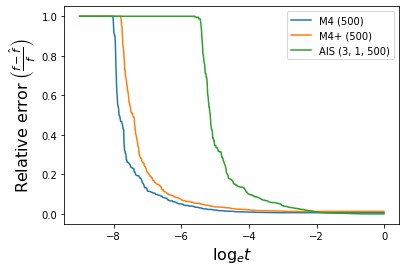

In [16]:
plt.plot(log_scale_range[:], 1-major_y_list_sdp[:], label="M4 (500)")
plt.plot(log_scale_range[:], 1-major_y_list_sdp_plus[:], label="M4+ (500)")
plt.plot(log_scale_range[:], 1-major_y_list_ais, label="AIS (3, 1, 500)")
# plt.xticks(log_scale_range[:])
plt.xlabel("$\log_e t$", fontsize=16)
plt.ylabel(r'Relative error $\left(\frac{f-\hat{f}}{f}\right)$', fontsize=16, rotation="vertical")
plt.legend()
plt.show()

<h2> Compare MAP estimates given by $M^4$ and $M^4$+

In [9]:
# Run our algorithm for all the problem instances
sdp_r, sdp_r_plus = [], []
rounding_iters = 500
for i in range(cw_len):
    sdp_r_cw, sdp_r_plus_cw = [], []
    for sample in range(num):
        print("CW =", i, " Sample number =", sample, end="\r")
        A = coupling_data[:, :, i, sample]
        h = bias_data[:, :, i, sample]
        mode = ground_truth_modes[i, sample]
        model.set_model_parameters(A, h, k)
        _, mode_sdp = model.solve_map(solver='M4')
        _, mode_sdp_plus = model.solve_map(solver='M4+')
        sdp_r_cw.append(1 - mode_sdp/mode)
        sdp_r_plus_cw.append(1 - mode_sdp_plus/mode)
    sdp_r.append(np.mean(sdp_r_cw))
    sdp_r_plus.append(np.mean(sdp_r_plus_cw))

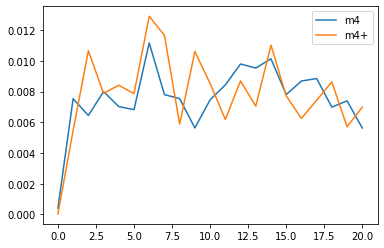

In [10]:
plt.plot(sdp_r, label="m4")
plt.plot(sdp_r_plus, label="m4+")
# plt.plot(ais_error, label="ais")
plt.legend()